In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from lda import LDATopicModel, load_data

In [4]:
# load cached data if available
cache_path = "preprocessed_20newsgroups.pickle"
if os.path.isfile(cache_path):
    with open(cache_path, "rb") as f:
        docs, dictionary = pickle.load(f)
else:
    docs, dictionary = load_data()
    # save docs and dictionary to cache using pickle
    with open(cache_path, "wb") as f:
        pickle.dump((docs, dictionary), f)

1. Implement the Latent Dirichlet allocation topic model, as described in
the previous lectures. Set the hyperparameters α = 0.1, γ = 0.1 and set
number of topics K = 20.

In [5]:
topics = 20
alpha = 0.1
gamma = 0.1
model = LDATopicModel(docs, dictionary, topics, alpha, gamma)
result_dir = f"ldamodel_topics{topics}_alpha{alpha}_gamma{gamma}"

2. Plot the distribution over topics for the longest document in the data after
initialization and after 1st, 2nd, 5th, 10th, 20th, 50th, and 100th iteration.
Comment on these. 

In [6]:
# show the longest document
max_len_document = np.array([len(d) for d in docs]).argmax()

print("First 30 tokens of the longest document:")
print(" ".join(dictionary[x] for x in docs[max_len_document][:30]))

First 30 tokens of the longest document:
stein washington mitch sport hockey frequent ask question univers washington expir repli washington nntp host stein washington archiv hockey sport hockey answer frequent ask question news content info minor leagu


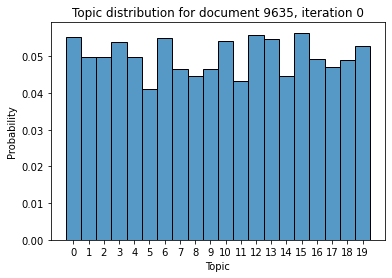

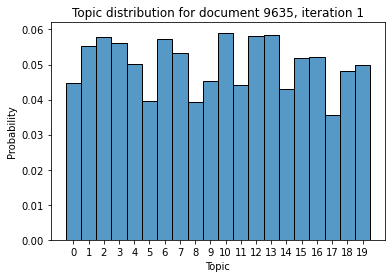

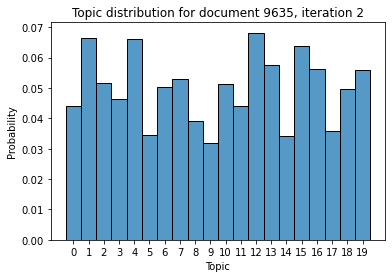

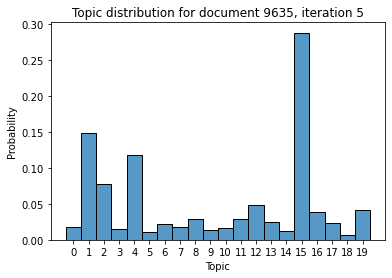

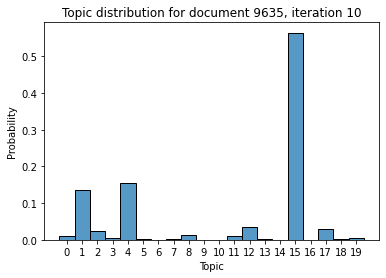

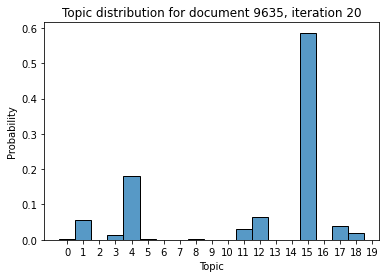

In [7]:
for it in [0, 1, 2, 5, 10, 20]:
    model.load(os.path.join(result_dir, f"model_{it}.pickle"))
    document = model.z_nd[max_len_document]

    ax = sns.histplot(document, stat="probability", discrete=True)
    ax.set_title(f"Topic distribution for document {max_len_document}, iteration {it}")
    ax.set_xlabel("Topic")
    ax.set_xticks(range(topics))
    ax.set_xticklabels(range(topics))
    plt.show()

3. Compute the word entropy for each of the topics as a function of the
number of Gibbs iterations. Plot them all in one figure. 

In [24]:
iterations = 20
H_ki = [[] for i in range(topics)]

for it in range(iterations):
    model.load(os.path.join(result_dir, f"model_{it}.pickle"))
    for k in range(topics):
        H_ki[k].append(model.entropy_topic(k))

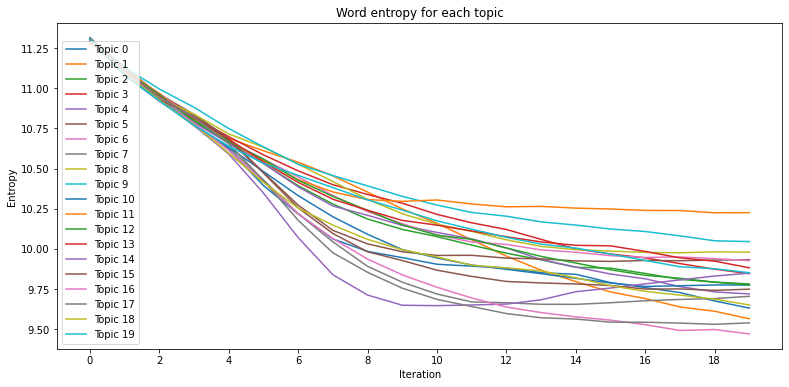

In [25]:
plt.figure(figsize=(13,6))
for k, H_k in enumerate(H_ki):
    ax = sns.lineplot(x=np.arange(iterations), y=H_k, label=f"Topic {k}")
    ax.set_title(f"Word entropy for each topic")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Entropy")
    xticks = range(0, iterations, 2)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    #plt.show()

4. Show histograms of the most frequent 20 words of three chosen topics after 100 Gibbs iterations. What are the chosen topics about?

In [26]:
model.load(os.path.join(result_dir, f"model_20.pickle"))